In [1]:
import numpy as np
import pandas as pd
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score



In [2]:
files = glob.glob('*.csv')


In [3]:
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

In [4]:
dfs

[                Date/Time  \
 0     Year 1 Jan 01 01:00   
 1     Year 1 Jan 01 02:00   
 2     Year 1 Jan 01 03:00   
 3     Year 1 Jan 01 04:00   
 4     Year 1 Jan 01 05:00   
 ...                   ...   
 8754  Year 1 Dec 31 19:00   
 8755  Year 1 Dec 31 20:00   
 8756  Year 1 Dec 31 21:00   
 8757  Year 1 Dec 31 22:00   
 8758  Year 1 Dec 31 23:00   
 
       [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
 0                                                   0.0        
 1                                                   0.0        
 2                                                   0.0        
 3                                                   0.0        
 4                                                   0.0        
 ...                                                 ...        
 8754                                                0.0        
 8755                                                0.0        
 8756                                                

In [5]:
data=pd.concat(dfs)

In [6]:
data


Date/Time  \
0     Year 1 Jan 01 01:00   
1     Year 1 Jan 01 02:00   
2     Year 1 Jan 01 03:00   
3     Year 1 Jan 01 04:00   
4     Year 1 Jan 01 05:00   
...                   ...   
8754  Year 1 Dec 31 19:00   
8755  Year 1 Dec 31 20:00   
8756  Year 1 Dec 31 21:00   
8757  Year 1 Dec 31 22:00   
8758  Year 1 Dec 31 23:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                      

In [7]:
data.dropna()

Date/Time  \
0     Year 1 Jan 01 01:00   
1     Year 1 Jan 01 02:00   
2     Year 1 Jan 01 03:00   
3     Year 1 Jan 01 04:00   
4     Year 1 Jan 01 05:00   
...                   ...   
8754  Year 1 Dec 31 19:00   
8755  Year 1 Dec 31 20:00   
8756  Year 1 Dec 31 21:00   
8757  Year 1 Dec 31 22:00   
8758  Year 1 Dec 31 23:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                      

In [8]:
data.dtypes

Date/Time                                                  object
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)    float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)     float64
[1] Site Outdoor Air Dewpoint Temperature  (C)            float64
[1] Site Outdoor Air Drybulb Temperature  (C)             float64
[1] Site Solar Altitude Angle  (deg)                      float64
[1] Site Solar Azimuth Angle  (deg)                       float64
[1] Site Wind Direction  (deg)                            float64
[1] Site Wind Speed  (m/s)                                float64
[1] Surface Outside Face Temperature  (C)                 float64
Orientation                                                 int64
Lats                                                      float64
Longs                                                     float64
[1] Dry Bulb Temperature (C)                              float64
[1] Global Horizontal Radiation (Wh/m2)                     int64
[1] Relati

In [9]:
import pandas as pd

# Assuming data_a0 is your DataFrame
data['Date/Time'] = pd.to_datetime(data['Date/Time'].str.replace('Year 1 ', '2002'), format="%Y%b %d %H:%M")


In [10]:
data

Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                               96

In [11]:
data.iloc[50]

Date/Time                                                 2002-01-03 03:00:00
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)                    0.0
[1] Site Direct Solar Radiation Rate per Area  (W/m2)                     0.0
[1] Site Outdoor Air Dewpoint Temperature  (C)                           6.15
[1] Site Outdoor Air Drybulb Temperature  (C)                            11.8
[1] Site Solar Altitude Angle  (deg)                               -62.150707
[1] Site Solar Azimuth Angle  (deg)                                 95.739049
[1] Site Wind Direction  (deg)                                            0.0
[1] Site Wind Speed  (m/s)                                              0.125
[1] Surface Outside Face Temperature  (C)                           17.089917
Orientation                                                                 0
Lats                                                                  23.0225
Longs                                                           

<Axes: >

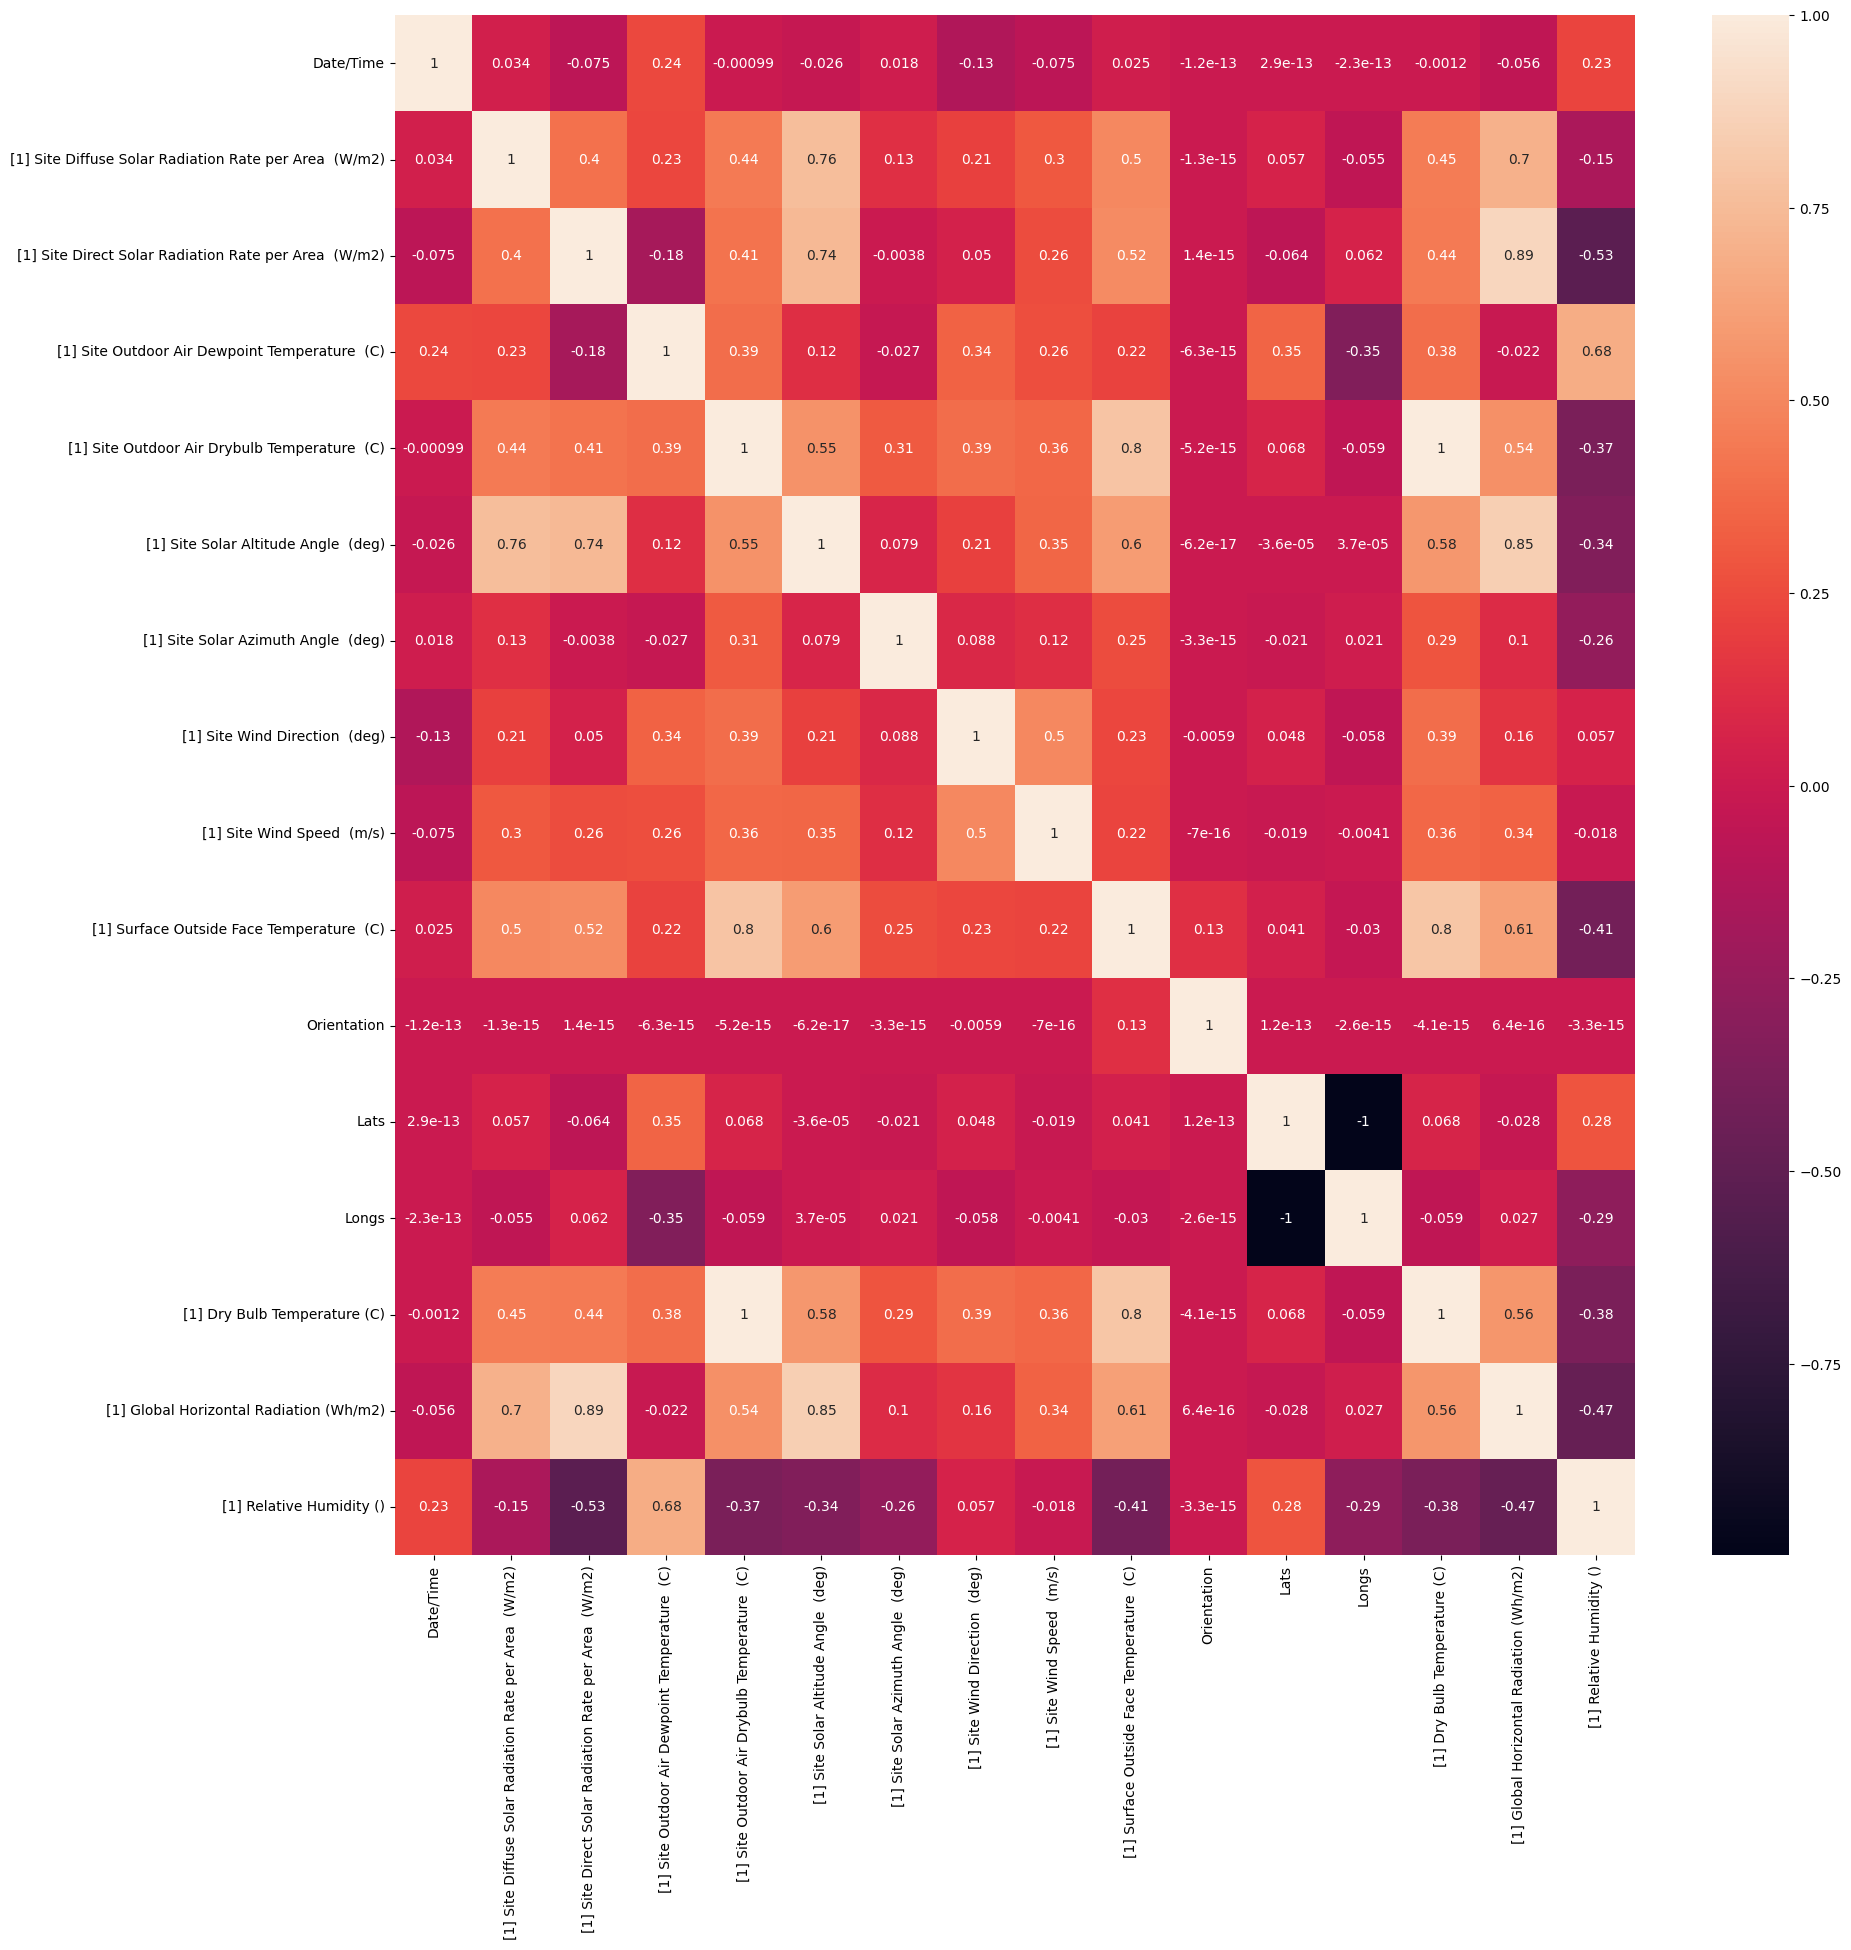

In [12]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)

In [13]:
data.dtypes
# Assuming theta, phi, and h are given angles in radians


Date/Time                                                 datetime64[ns]
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)           float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)            float64
[1] Site Outdoor Air Dewpoint Temperature  (C)                   float64
[1] Site Outdoor Air Drybulb Temperature  (C)                    float64
[1] Site Solar Altitude Angle  (deg)                             float64
[1] Site Solar Azimuth Angle  (deg)                              float64
[1] Site Wind Direction  (deg)                                   float64
[1] Site Wind Speed  (m/s)                                       float64
[1] Surface Outside Face Temperature  (C)                        float64
Orientation                                                        int64
Lats                                                             float64
Longs                                                            float64
[1] Dry Bulb Temperature (C)                       

In [14]:
%pip install ephem

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
data.describe()

Date/Time  \
count               105108   
mean   2002-07-02 12:00:00   
min    2002-01-01 01:00:00   
25%    2002-04-02 06:00:00   
50%    2002-07-02 12:00:00   
75%    2002-10-01 18:00:00   
max    2002-12-31 23:00:00   
std                    NaN   

       [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
count                                      105108.000000        
mean                                           78.309396        
min                                             0.000000        
25%                                             0.000000        
50%                                             6.750000        
75%                                           134.000000        
max                                           548.500000        
std                                           113.574154        

       [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
count                                      105108.000000       
mean                                          231.019608       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                           426.000000       
max                                          1100.000000       
std                                           330.532462       

       [1] Site Outdoor Air Dewpoint Temperature  (C)  \
count                                   105108.000000   
mean                                        16.296727   
min                                         -5.900000   
25%                                         10.025000   
50%                                         17.400000   
75%                                         22.925000   
max                                         28.900000   
std                                          7.137327   

       [1] Site Outdoor Air Drybulb Temperature  (C)  \
count                                  105108.000000   
mean                                       25.848619   
min                                        -1.500000   
25%                                        22.300000   
50%                                        26.350000   
75%                                        29.950000   
max                                        43.925000   
std                                         6.171036   

       [1] Site Solar Altitude Angle  (deg)  \
count                         105108.000000   
mean                               0.227428   
min                              -86.550209   
25%                              -37.365723   
50%                                0.247593   
75%                               37.415117   
max                               86.550276   
std                               43.769597   

       [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
count                        105108.000000                    96349.000000   
mean                            174.838904                      169.285802   
min                               4.730277                        0.000000   
25%                              87.134762                       47.750000   
50%                             169.146494                      209.250000   
75%                             267.856319                      265.750000   
max                             347.296505                      358.500000   
std                              97.401449                      112.322566   

       [1] Site Wind Speed  (m/s)  [1] Surface Outside Face Temperature  (C)  \
count               105108.000000                              105108.000000   
mean                     3.751532                                  30.128219   
min                      0.000000                                   9.274649   
25%                      1.500000                                  24.606212   
50%                      3.100000    

In [16]:
data.columns

Index(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()'],
      dtype='object')

In [17]:
# import math
# import ephem
# import pandas as pd

# def calculate_solar_parameters(data_row):
#     # Set observer's latitude and longitude
#     o.lat, o.long = str(data_row['Lats']), str(data_row['Longs'])

#     # Get the Sun object
#     sun = ephem.Sun()

#     # Calculate sunrise, solar noon, and sunset
#     sunrise = o.previous_rising(sun, start=ephem.now())
#     solar_noon = o.next_transit(sun, start=sunrise)
#     sunset = o.next_setting(sun, start=solar_noon)

#     # Convert ephem.Date to pandas Timestamp
#     solar_noon = pd.to_datetime(solar_noon.datetime())

#     # Determine if the given time is before or after solar noon
#     given_time = data_row['Date/Time']
#     if given_time < solar_noon:
#         hourangle = 2.5 * (abs((given_time - solar_noon).seconds) // 60)
#     else:
#         hourangle = -2.5 * (abs((given_time - solar_noon).seconds) // 60)

#     # Calculate declination
#     N = data_row['N']
#     declination = 23.45 * math.sin(math.radians(360 * (284 + N) / 365))

#     # Get azimuth from the data_row
#     azimuth = data_row['[1] Site Solar Azimuth Angle  (deg)']

#     return declination, hourangle, azimuth

# def calculate_tt(data_row):
#     # Get solar parameters
#     declination, hourangle, azimuth = calculate_solar_parameters(data_row)

#     # Convert angles to radians for trigonometric functions
#     latitude_rad = math.radians(data_row['Lats'])
#     declination_rad = math.radians(declination)
#     hourangle_rad = math.radians(hourangle)
#     azimuth_rad = math.radians(azimuth)

#     # Calculate the cosine of tt using the given formula
#     cos_tt = (
#         -math.cos(latitude_rad) * math.sin(declination_rad) * math.cos(azimuth_rad)
#         + math.sin(latitude_rad) * math.cos(declination_rad) * math.cos(hourangle_rad) * math.cos(azimuth_rad)
#         + math.cos(declination_rad) * math.sin(hourangle_rad) * math.sin(azimuth_rad)
#     )

#     # Calculate tt using the arccosine function
#     tt = cos_tt

#     return tt

# # Assuming your DataFrame is named 'data'
# data['N'] = data['Date/Time'].dt.dayofyear

# # Create an observer
# o = ephem.Observer()

# # Apply the functions to each row of the DataFrame
# data['cos_incident_angle'] = data.apply(calculate_tt, axis=1)

# # Display the result
# print(data[['Date/Time', 'Lats', 'Longs', 'cos_incident_angle']])


In [18]:
data

Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                               96

In [19]:
# data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] = pd.to_numeric(data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'], errors='coerce')
# data['[1] Site Solar Azimuth Angle  (deg)'] = pd.to_numeric(data['[1] Site Solar Azimuth Angle  (deg)'], errors='coerce')

# data['solar gain'] = data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] * data['cos_incident_angle'] +\
#                      data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] * (1 + np.cos(np.radians(data['[1] Site Solar Azimuth Angle  (deg)'])) / 2)


In [20]:
# data['cos_altitude']=np.cos(np.radians(data['[1] Site Solar Altitude Angle  (deg)']))

In [21]:
# plt.figure(figsize = (20,20))
# sns.heatmap(data.corr(),annot = True)

In [22]:
# plt.scatter(data['[1] Site Wind Speed  (m/s)'],data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'])

In [23]:
column_name=[ '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)'
      ]

In [24]:
data1=data
data1.drop(column_name,axis=1,inplace=True)

In [25]:
data1.dropna()

Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  \
0                               91.104045   
1                               93.157099   
2                               96.159063   
3                               99.382686   
4                              102.92303

In [26]:


# Assuming your dataframe is named df
# Convert the 'Date/Time' column to datetime format
data1['Date/Time'] = pd.to_datetime(data1['Date/Time'])

# Extract month, day, and hour into separate columns
data1['Month'] = data1['Date/Time'].dt.month
data1['Day'] = data1['Date/Time'].dt.day
data1['Hour'] = data1['Date/Time'].dt.hour

# Display the modified dataframe
data1


Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  \
0                               91.104045   
1                               93.157099   
2                               96.159063   
3                               99.382686   
4                              102.92303

In [27]:
data1.drop(['Date/Time'],axis=1,inplace=True)

In [28]:
data1=data1.dropna()

In [29]:
data1.describe()

[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
count                                      105108.000000        
mean                                           78.309396        
std                                           113.574154        
min                                             0.000000        
25%                                             0.000000        
50%                                             6.750000        
75%                                           134.000000        
max                                           548.500000        

       [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
count                                      105108.000000       
mean                                          231.019608       
std                                           330.532462       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                           426.000000       
max                                          1100.000000       

       [1] Site Outdoor Air Dewpoint Temperature  (C)  \
count                                   105108.000000   
mean                                        16.296727   
std                                          7.137327   
min                                         -5.900000   
25%                                         10.025000   
50%                                         17.400000   
75%                                         22.925000   
max                                         28.900000   

       [1] Site Outdoor Air Drybulb Temperature  (C)  \
count                                  105108.000000   
mean                                       25.848619   
std                                         6.171036   
min                                        -1.500000   
25%                                        22.300000   
50%                                        26.350000   
75%                                        29.950000   
max                                        43.925000   

       [1] Site Solar Altitude Angle  (deg)  \
count                         105108.000000   
mean                               0.227428   
std                               43.769597   
min                              -86.550209   
25%                              -37.365723   
50%                                0.247593   
75%                               37.415117   
max                               86.550276   

       [1] Site Solar Azimuth Angle  (deg)  \
count                        105108.000000   
mean                            174.838904   
std                              97.401449   
min                               4.730277   
25%                              87.134762   
50%                             169.146494   
75%                             267.856319   
max                             347.296505   

       [1] Surface Outside Face Temperature  (C)    Orientation  \
count                              105108.000000  105108.000000   
mean                                   30.128219     135.000000   
std                                     8.216458     100.623538   
min                                     9.274649       0.000000   
25%                                    24.606212      67.500000   
50%                                    29.156610     135.000000   
75%                                    34.889548     202.500000   
max                                    63.868828     270.000000   

                Lats          Longs  [1] Dry Bulb Temperature (C)  \
count  105108.000000  105108.000000                 105108.000000   
mean       22.994700      72.698667                     25.848636   
std         0.214174       2.528997                      6.198734   
min        22.719600      69.666900                     -2.600000   
25%        22.719600      69.666900  

In [30]:
 from sklearn.linear_model import LinearRegression


In [31]:
X = data1.drop(['[1] Surface Outside Face Temperature  (C)'], axis = 1)
Y = data1['[1] Surface Outside Face Temperature  (C)']
X.columns


Index(['[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', 'Orientation', 'Lats', 'Longs',
       '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'Month', 'Day', 'Hour'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [33]:
reg = LinearRegression().fit(X_train, y_train)

In [34]:
reg.score(X_train, y_train)

0.725340204282536

In [35]:
reg.coef_

array([ 1.90296148e-02,  1.09072613e-02,  1.71685674e-02,  2.55696805e+00,
       -9.39999841e-03,  8.01521534e-04,  1.05667825e-02,  6.37736041e+01,
        5.35707419e+00, -1.74368394e+00, -6.27564236e-03, -2.06484988e-02,
        1.03143157e-01, -2.33366621e-03,  2.54057016e-02])

<Axes: >

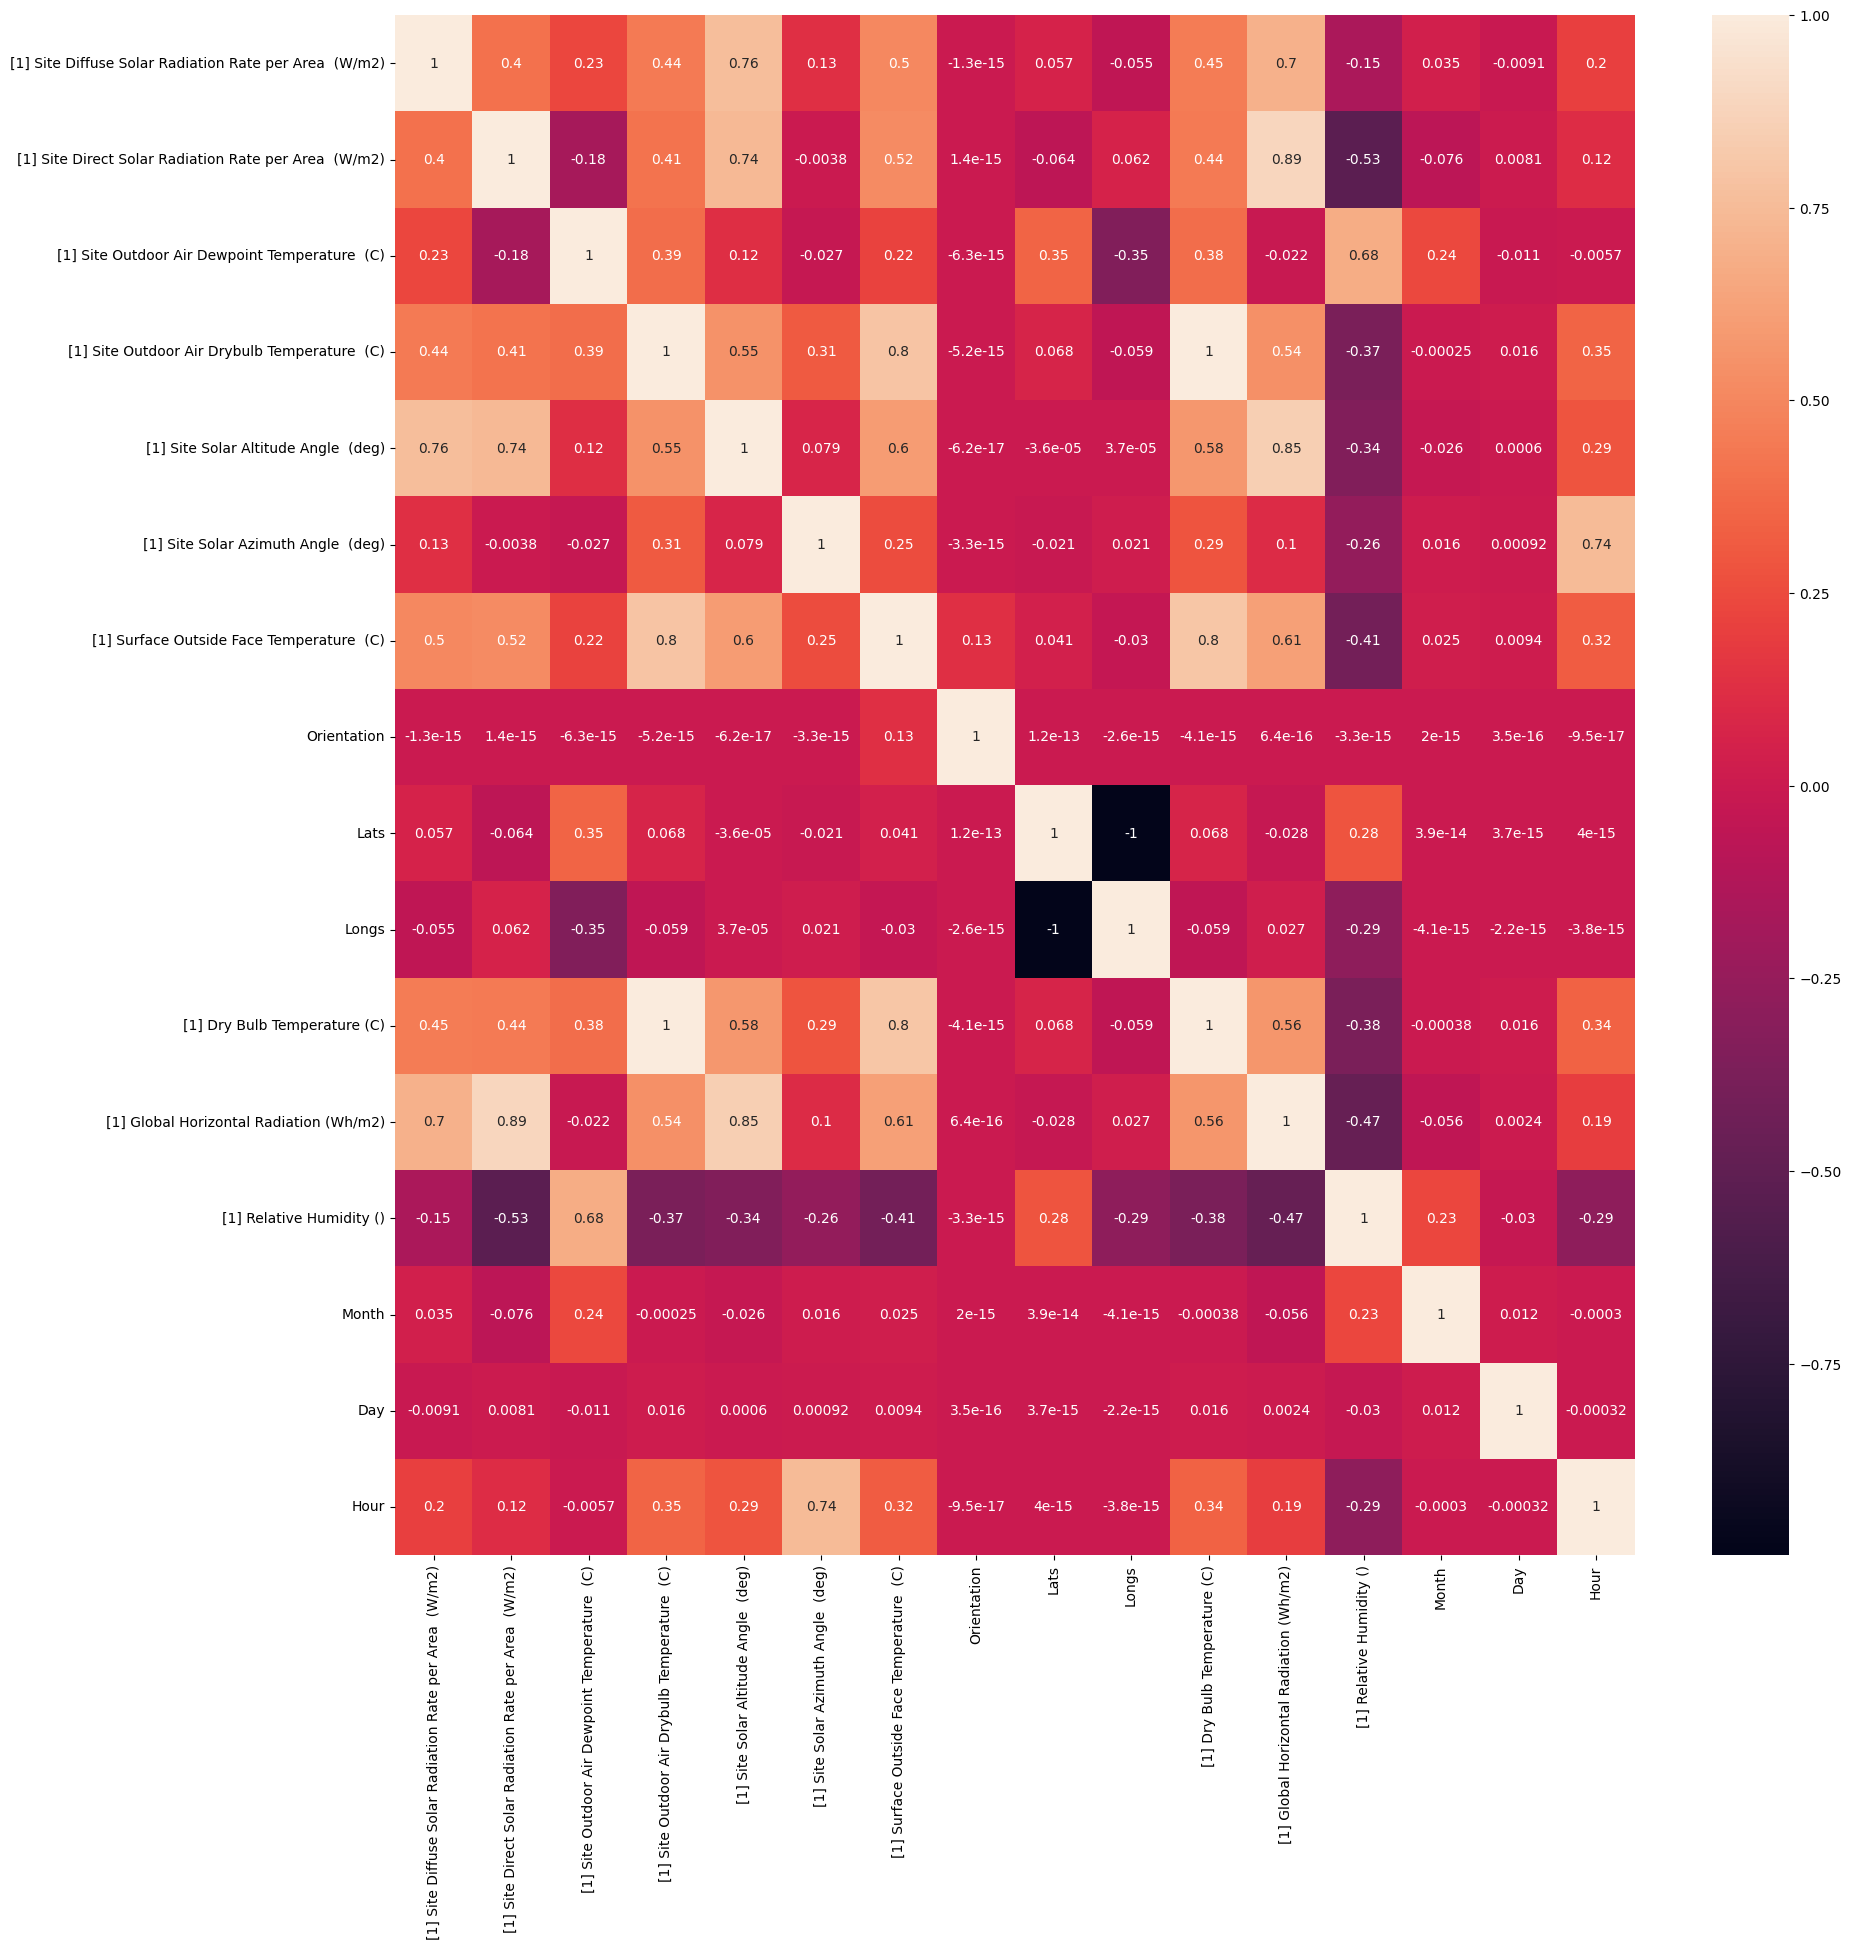

In [36]:
plt.figure(figsize = (20,20))
sns.heatmap(data1.corr(),annot = True)

In [37]:
import math
data['cos_orientation'] = np.cos(np.radians(data['Orientation']))
data['cos_[1] Site Solar Altitude Angle  (deg)'] = np.cos(np.radians(data['[1] Site Solar Altitude Angle  (deg)']))
data['cos_[1] Site Solar Azimuth Angle  (deg)'] = np.cos(np.radians(data['[1] Site Solar Azimuth Angle  (deg)']))


In [38]:
new_data=data1

In [39]:
new_data.drop(['[1] Site Solar Azimuth Angle  (deg)'],axis=1,inplace=True)

In [40]:
X = new_data.drop(['[1] Surface Outside Face Temperature  (C)'], axis = 1)
Y = new_data['[1] Surface Outside Face Temperature  (C)']
X.columns


Index(['[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)', 'Orientation', 'Lats', 'Longs',
       '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'Month', 'Day', 'Hour'],
      dtype='object')

<Axes: >

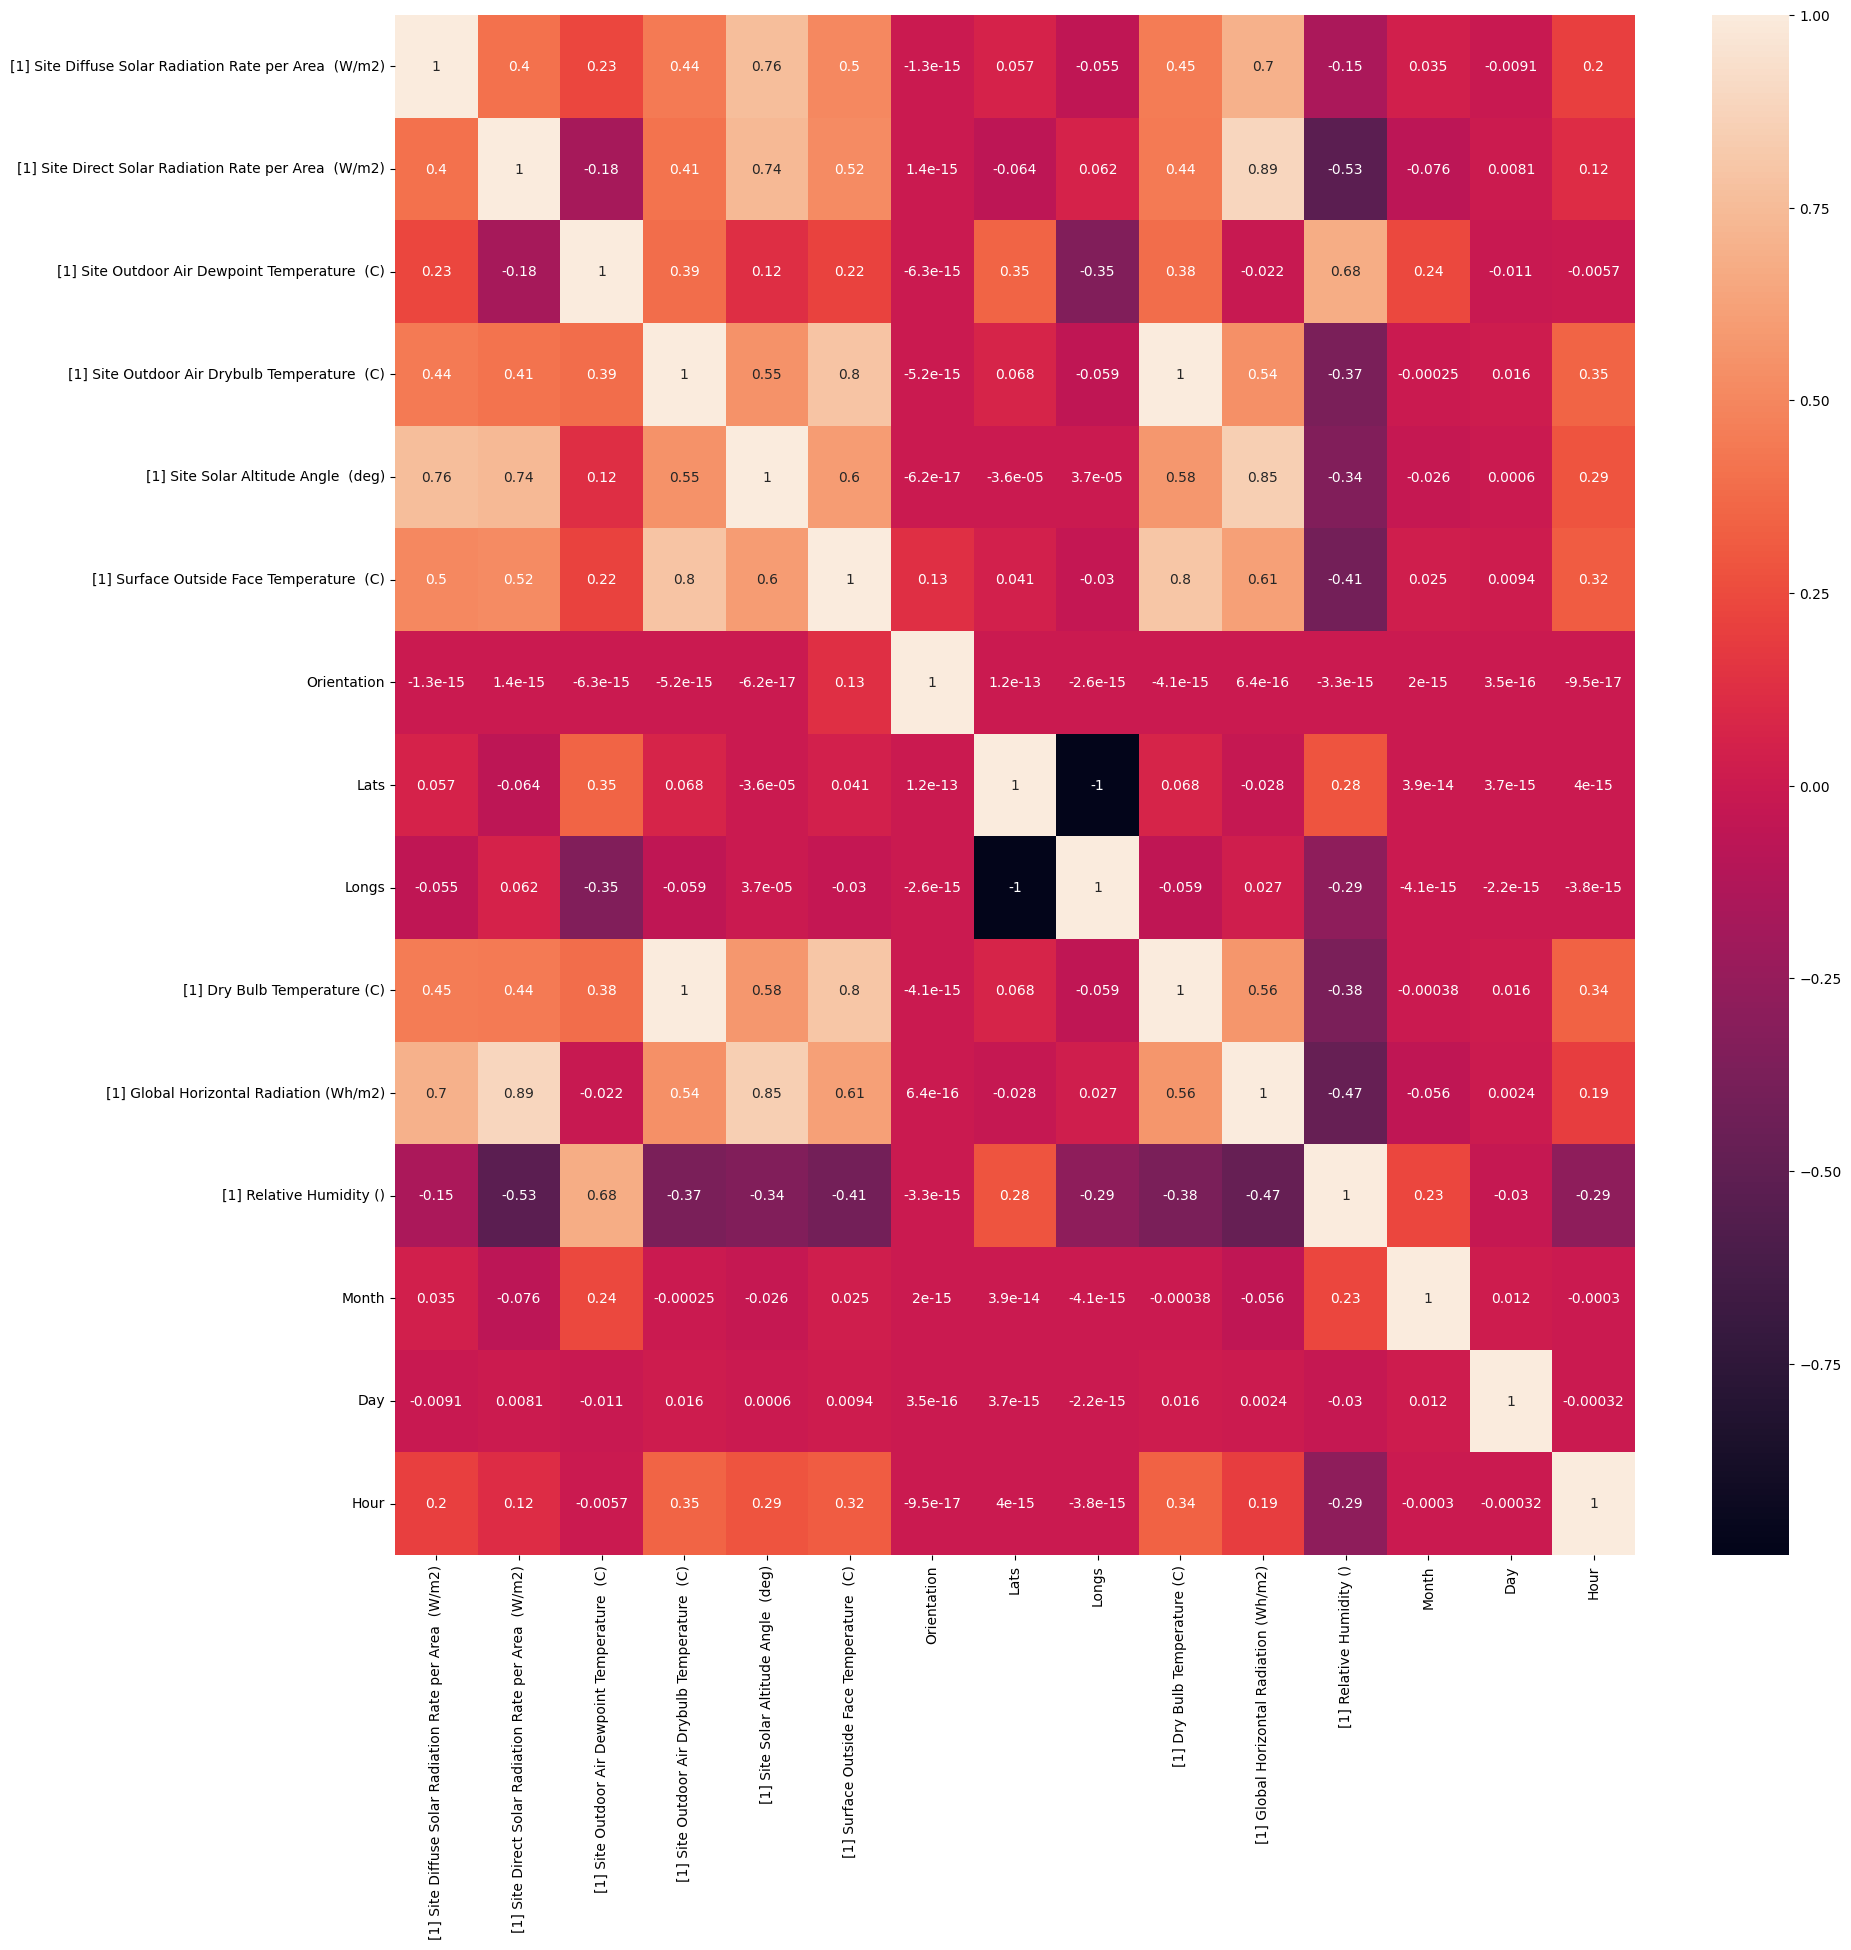

In [41]:
plt.figure(figsize = (20,20))
sns.heatmap(new_data.corr(),annot = True)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [43]:
reg = LinearRegression().fit(X_train, y_train)

In [44]:
reg.score(X_train, y_train)

0.7253069119549911

In [45]:
data.columns

Index(['[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'Month', 'Day', 'Hour', 'cos_orientation',
       'cos_[1] Site Solar Altitude Angle  (deg)',
       'cos_[1] Site Solar Azimuth Angle  (deg)'],
      dtype='object')

In [46]:
new_data.columns

Index(['[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'Month', 'Day', 'Hour'],
      dtype='object')

In [47]:
new_data.drop(['[1] Site Solar Altitude Angle  (deg)','[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)','[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)'],axis=1,inplace=True)

In [48]:
new_data

[1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Surface Outside Face Temperature  (C)  Orientation     Lats  \
0                                     17.425801            0  23.0225   
1                                     17.436224            0  23.0225   
2                                     17.430286            0  23.0225   
3                                     17.410444            0  23.0225   
4                                     17.374948            0  23.0225   
...                                         ...          ...      ...   
8754                                  23.663594           90  22.7196   
8755                                  22.149918           90  22.7196   
8756                                  20.445485           90  22.7196   
8757                                  19.256711           90  22.7196   
8758                                  18.259292           90  22.7196   

        Longs  [1] Dry Bulb Temperature (C)  \
0     72.5714                          13.7   
1     72.5714                          13.5   
2     72.5714                          13.0   
3     72.5714                          12.2   
4     72.5714                          11.4   
...       ...                           ...   
8754  75.8577                          20.7   
8755  75.8577                          17.6   
8756  75.8577                          15.5   
8757  75.8577                          14.1   
8758  75.8577                          14.0   

      [1] Global Horizontal Radiation (Wh/m2)  [1] Relative Humidity ()  \
0                                           0                        58   
1                                           0                        64   
2                                           0                        70   
3                                           0                        75   
4                                           0                        80   
...                                       ...                       ...   
8754                                        0                        39   
8755                                        0                        48   
8756                                        0                        58   
8757                                        0                        65   
8758                                        0                        66   

      Month  Day  Hour  
0         1    1     1  
1         1    1     2  
2         1    1     3  
3         1    1     4  
4         1    1     5  
...     ...  ...   ...  
8754     12   31    19  
8755     12   31    20  
8756     12   31    21  
8757     12   31    22  
8758     12   31    23  

[105108 rows x 11 columns]

In [49]:
pd.get_dummies(new_data['Orientation'])

0      90     180    270
0      True  False  False  False
1      True  False  False  False
2      True  False  False  False
3      True  False  False  False
4      True  False  False  False
...     ...    ...    ...    ...
8754  False   True  False  False
8755  False   True  False  False
8756  False   True  False  False
8757  False   True  False  False
8758  False   True  False  False

[105108 rows x 4 columns]

<Axes: >

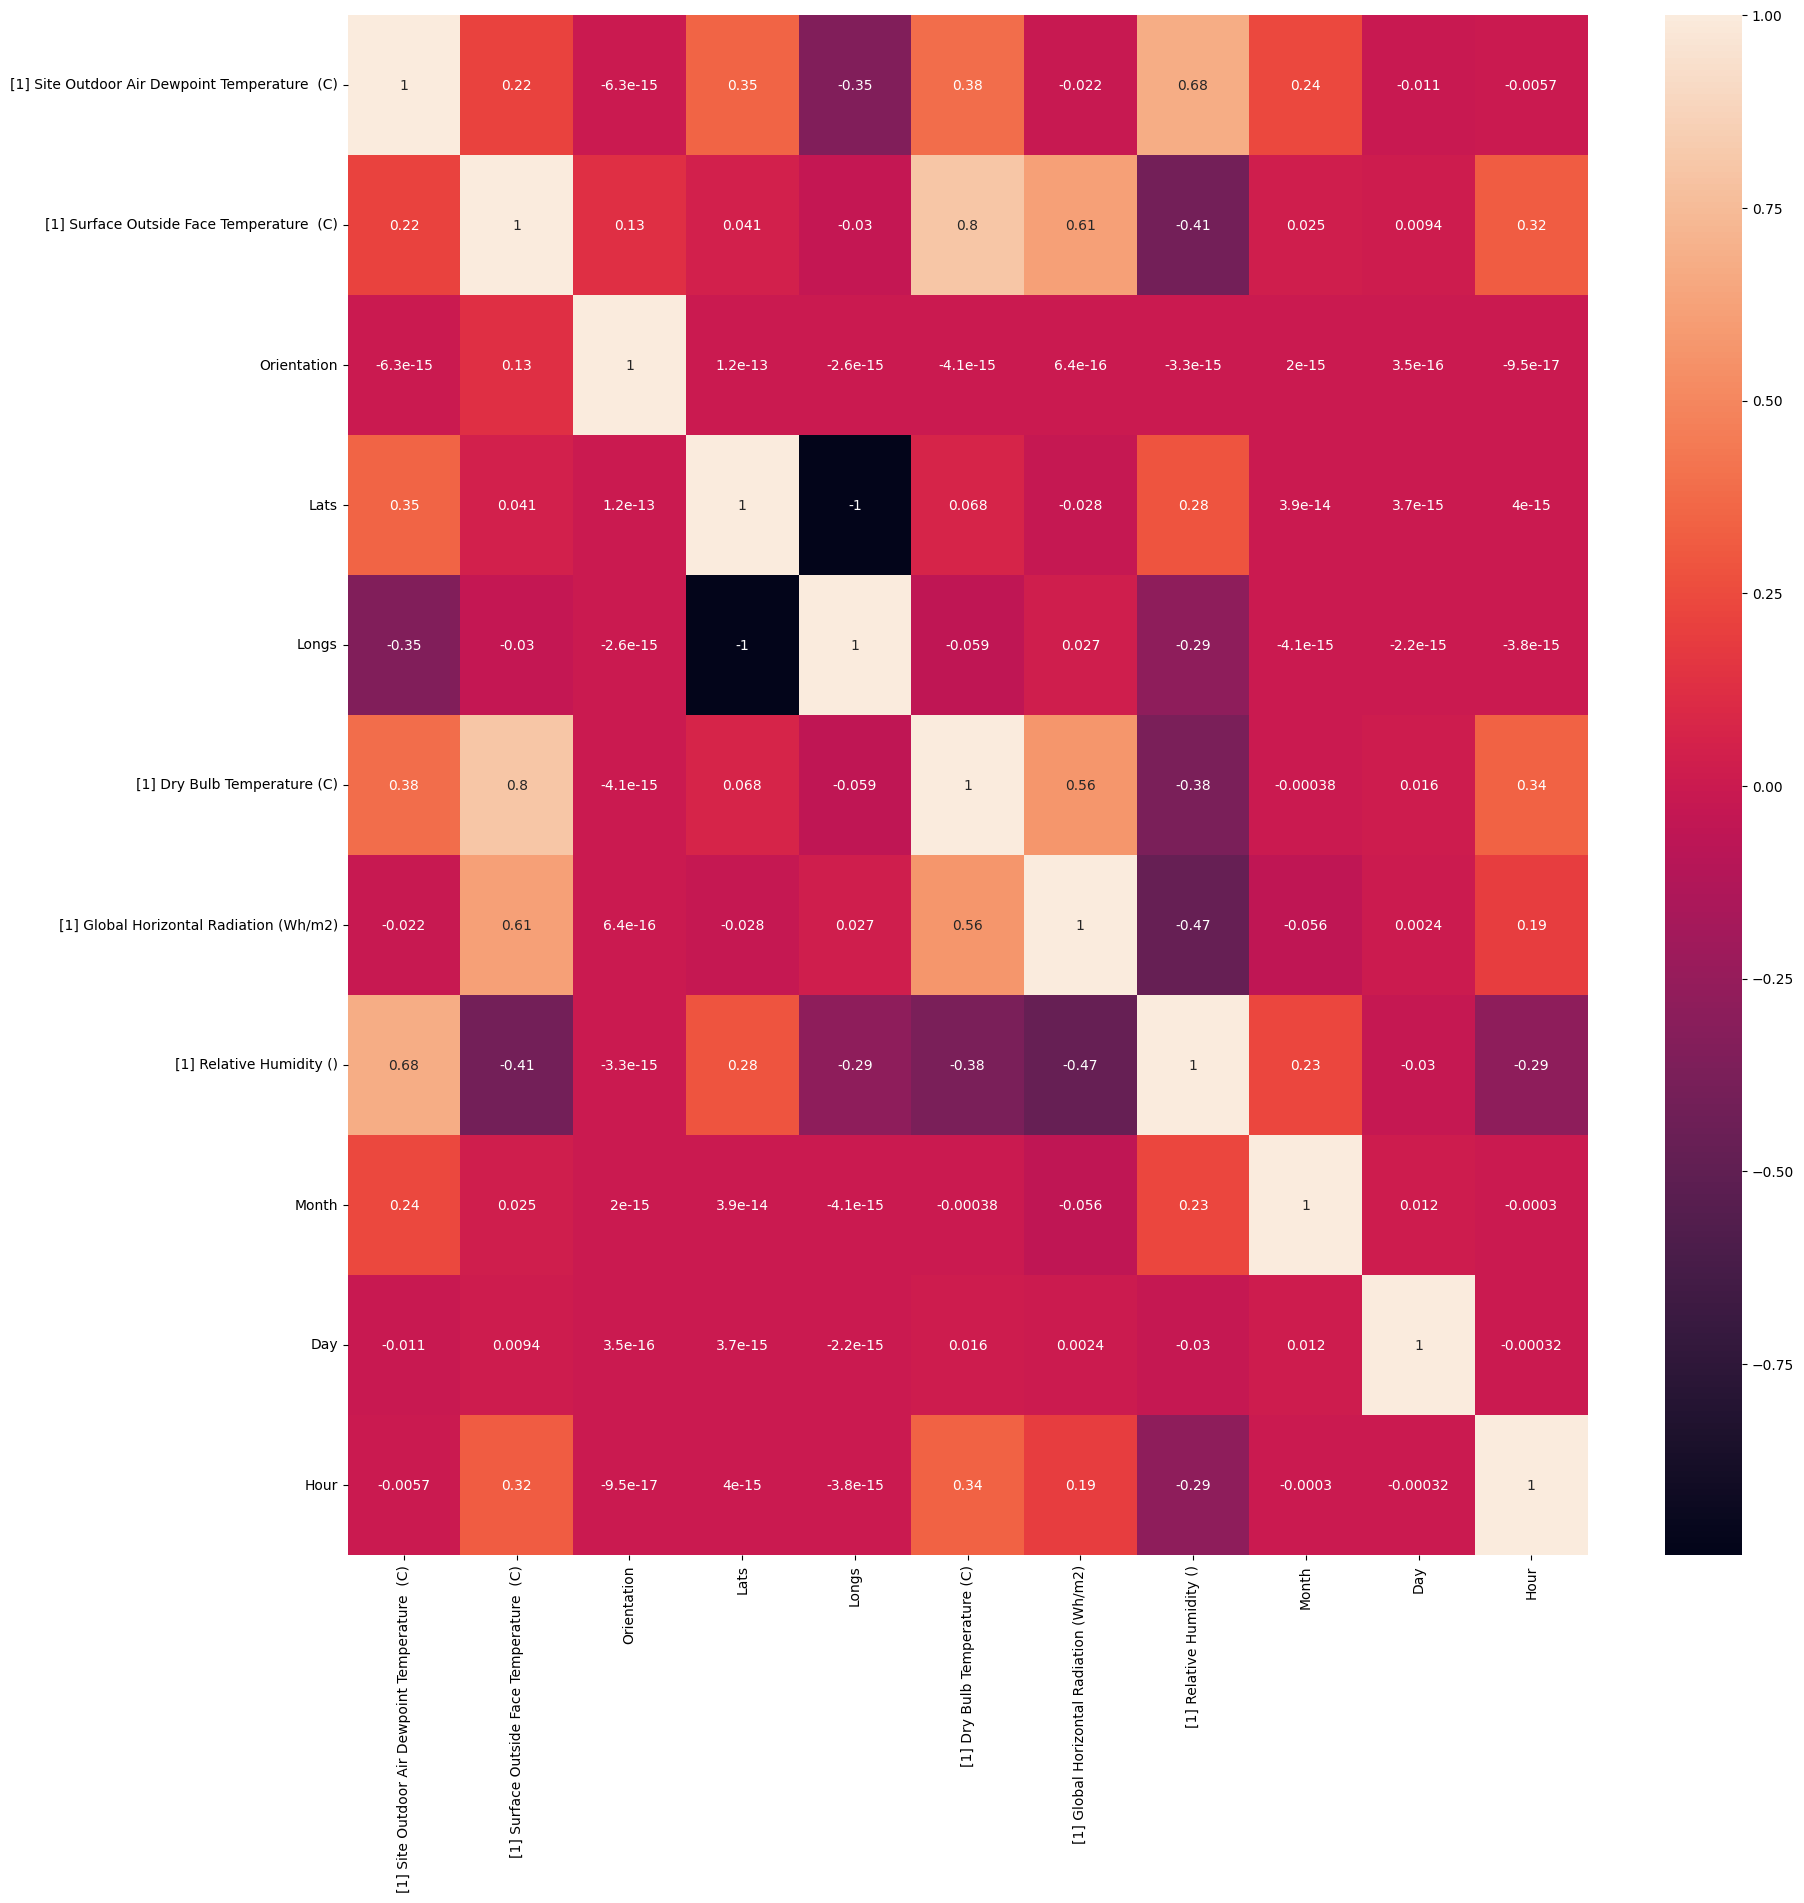

In [56]:
plt.figure(figsize = (20,20))
sns.heatmap(new_data.corr(),annot = True)

In [57]:
X = new_data.drop(['[1] Surface Outside Face Temperature  (C)'], axis = 1)
Y = new_data['[1] Surface Outside Face Temperature  (C)']
X.columns
X.columns = X.columns.astype(str) 

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [59]:
X_train.dtypes


[1] Site Outdoor Air Dewpoint Temperature  (C)    float64
Orientation                                         int64
Lats                                              float64
Longs                                             float64
[1] Dry Bulb Temperature (C)                      float64
[1] Global Horizontal Radiation (Wh/m2)             int64
[1] Relative Humidity ()                            int64
Month                                               int32
Day                                                 int32
Hour                                                int32
dtype: object

In [60]:
reg = LinearRegression().fit(X_train, y_train)

In [61]:
reg.score(X_train, y_train)

0.7080983206800493

In [62]:
new_data.columns


Index(['[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'Month', 'Day', 'Hour'],
      dtype='object')

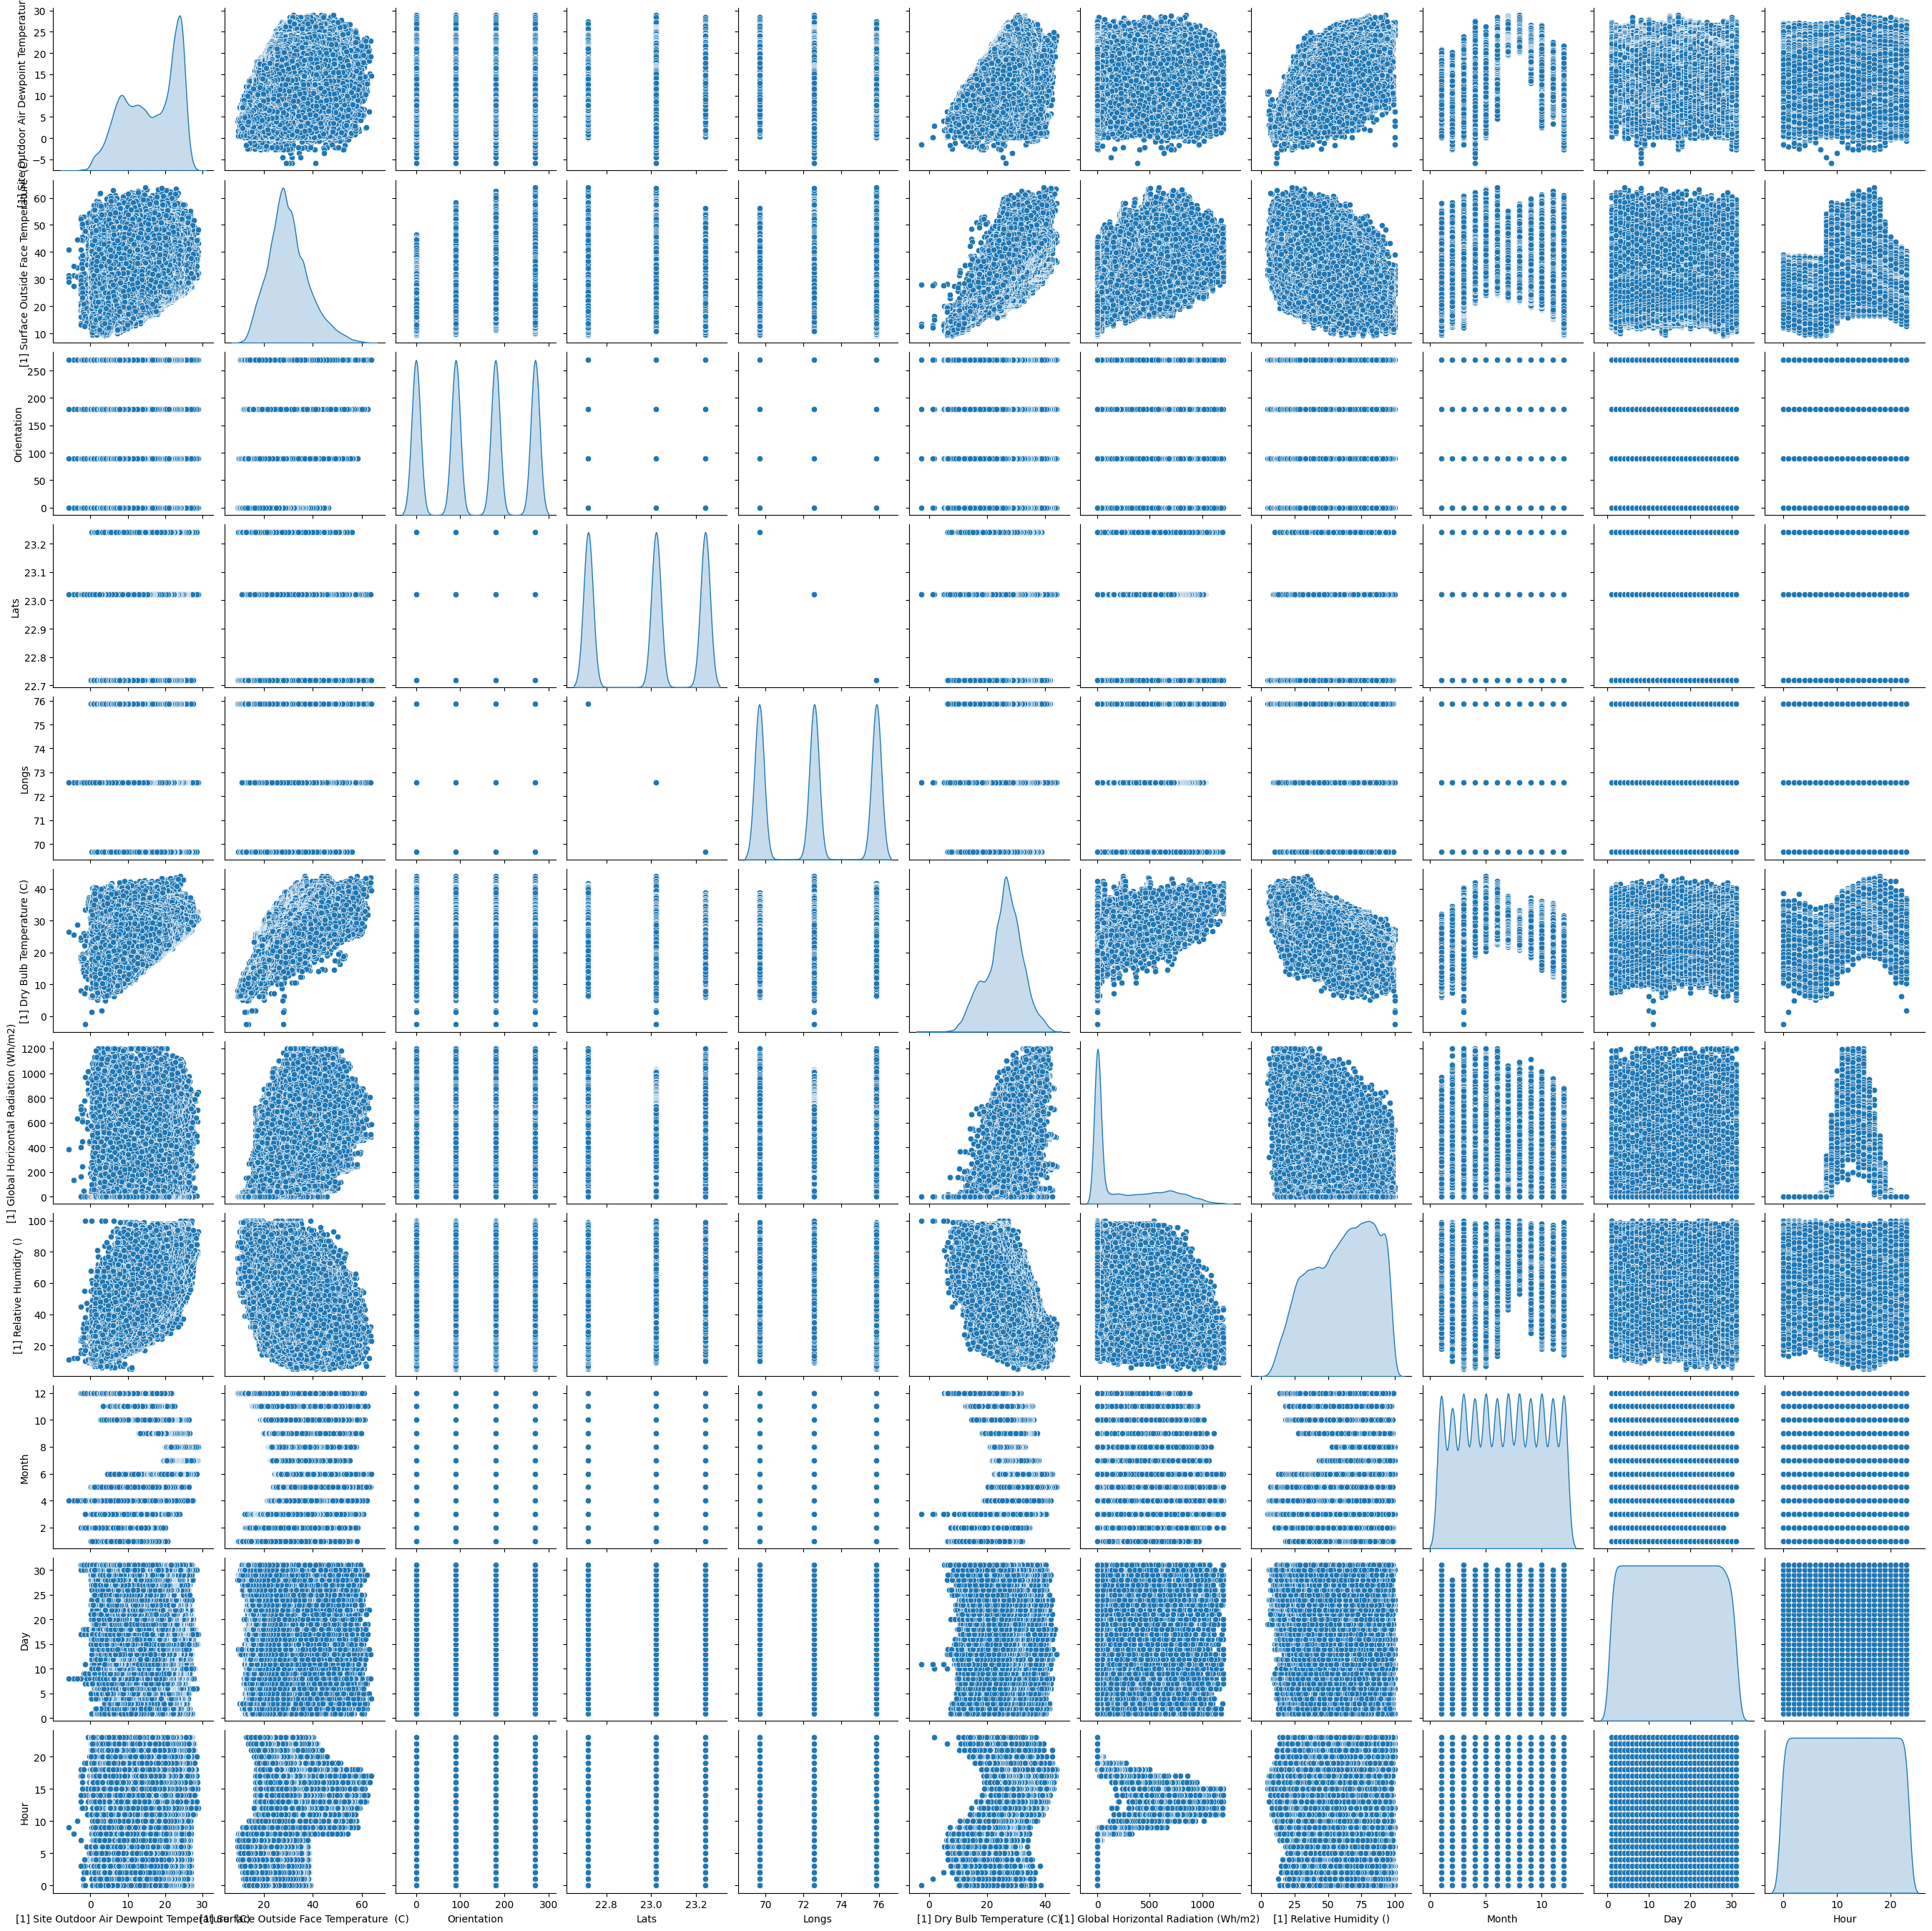

In [63]:
sns.pairplot(new_data[['[1] Site Outdoor Air Dewpoint Temperature  (C)',
            '[1] Surface Outside Face Temperature  (C)',
                                          'Orientation',
                                                 'Lats',
                                                'Longs',
                         '[1] Dry Bulb Temperature (C)',
              '[1] Global Horizontal Radiation (Wh/m2)',
                             '[1] Relative Humidity ()',
                                                'Month',
                                                  'Day',
                                                 'Hour',
                      ]],diag_kind = 'kde')


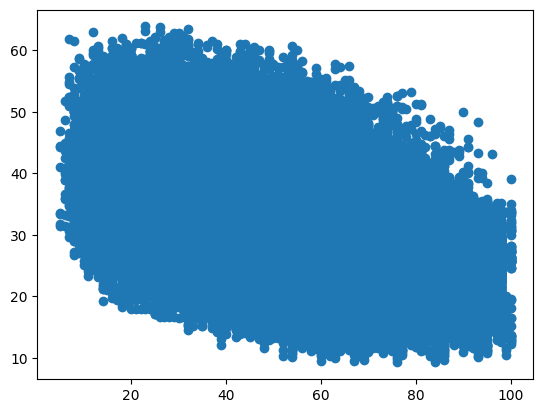

In [64]:
plt.scatter(new_data[ '[1] Relative Humidity ()'],new_data['[1] Surface Outside Face Temperature  (C)'])

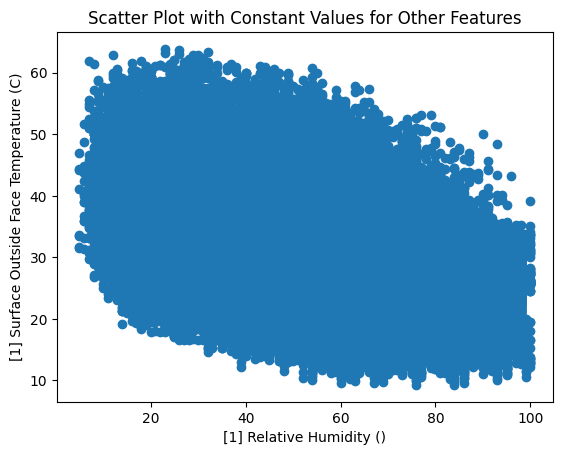

In [65]:
import matplotlib.pyplot as plt

# Assuming new_data is your DataFrame

# Define constant values for other features
constant_values = {
                                          'Orientation': 90,
                         '[1] Dry Bulb Temperature (C)': 34,
                                                      0: 0,
                                                     90: 1,
                                                    180: 0,
                                                    270: 0
    # Add other features and their constant values here
}

# Scatter plot with constant values for other features
plt.scatter(new_data['[1] Relative Humidity ()'], new_data['[1] Surface Outside Face Temperature  (C)'])
plt.xlabel('[1] Relative Humidity ()')
plt.ylabel('[1] Surface Outside Face Temperature (C)')
plt.title('Scatter Plot with Constant Values for Other Features')
plt.show()


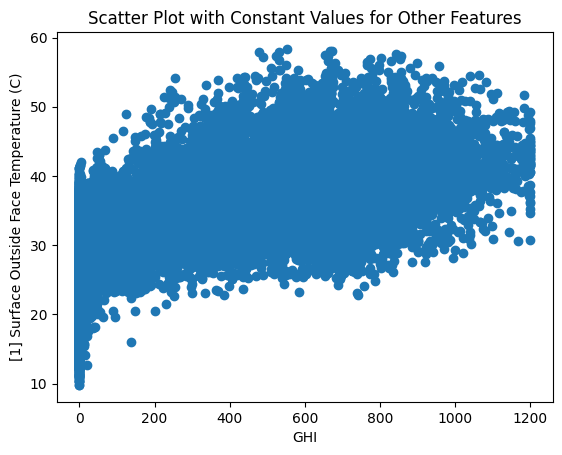

In [66]:
import matplotlib.pyplot as plt

# Define constant values for other features
constant_values = {
                                         
                         'Orientation': 90,
    


    # Add other features and their constant values here
}

# Filter the DataFrame based on constant values
filtered_data = new_data.copy()  # Make a copy to avoid modifying the original DataFrame
for feature, value in constant_values.items():
    filtered_data = filtered_data[filtered_data[feature] == value]

# Create a scatter plot between relative humidity and outside surface temperature
plt.scatter(filtered_data['[1] Global Horizontal Radiation (Wh/m2)'], filtered_data['[1] Surface Outside Face Temperature  (C)'])
plt.xlabel('GHI')
plt.ylabel('[1] Surface Outside Face Temperature (C)')
plt.title('Scatter Plot with Constant Values for Other Features')
plt.show()


In [67]:
X.drop(columns=['0', '90', '180', '270'],axis=1,inplace=True)

KeyError: "['0', '90', '180', '270'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


In [ ]:
X_train

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 8, activation = tf.nn.relu, input_shape = [X_train.shape[1]]),
    tf.keras.layers.Dense(units = 1)
    ])

In [ ]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001), metrics = ['mae','mse'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 64, validation_data=(X_test, y_test))

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')


plt.show()


In [ ]:
y_pred=model.predict(X_test)


In [ ]:
pd.DataFrame(list(zip(y_test, y_pred)),columns=['Actual Values','Predicted Values'])

In [ ]:
r2_score(y_test,y_pred)